# **LAB 3-  SastoBazar Online Kirana Delivery – Kathmandu & Lalitpur**

=========== FIRST 10 ROWS ===========
   Emails_Sent  Open_Rate  Click_Through_Rate  Bounce_Rate  Unsubscribe_Count  \
0         9270  10.115724            3.381377     1.457526                 23   
1         2860   6.951548            0.580071     7.451642                  6   
2         7390  33.466566           12.324191     6.503339                 57   
3         7191  33.968961           10.749431     5.140549                 48   
4         7734  29.251920           11.070604     6.997393                 36   
5         8265  14.138413           11.683420     6.468642                 74   
6         2466   7.930163            1.573647     1.655246                 36   
7         6426  25.526991            5.697753     7.161960                 72   
8         7578  18.204575            2.180101     4.406869                 59   
9        10322   8.661147           13.015000     6.498033                 79   

   Promo_Code_Used  Conversions  
0        17.608117    17.910783  
1 

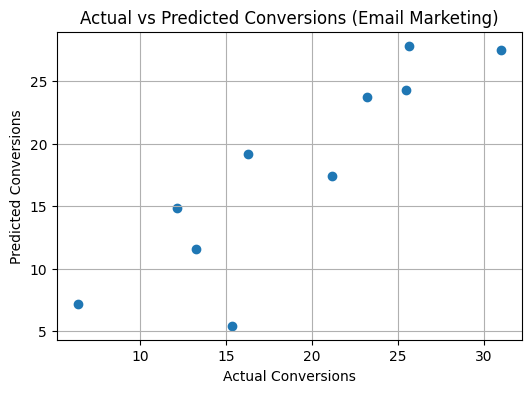

In [8]:
# =============================================================
# EMAIL MARKETING — MULTIPLE LINEAR REGRESSION (6 Inputs → 1 Output)
# DATA → MODEL → DECISION
# =============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

np.random.seed(42)



# ---------------------------------------------------------
# 1. SYNTHETIC EMAIL MARKETING DATA (40 DAYS)
# ---------------------------------------------------------

n_days = 40

Emails_Sent = np.random.randint(2000, 12000, n_days)            # total emails sent
Open_Rate = np.random.uniform(5, 35, n_days)                     # %
Click_Through_Rate = np.random.uniform(0.5, 15, n_days)          # %
Bounce_Rate = np.random.uniform(0.2, 8, n_days)                  # %
Unsubscribe_Count = np.random.randint(5, 80, n_days)             # #
Promo_Code_Used = np.random.uniform(0.5, 20, n_days)             # %






# True underlying function for conversions (with noise)
noise = np.random.normal(0, 4, n_days)

Conversions = (
    0.0015 * Emails_Sent +           # sending more emails helps
    0.35 * Open_Rate +               # open rate highly influences conversions
    0.75 * Click_Through_Rate +      # CTR is VERY important
    -0.60 * Bounce_Rate +            # bounce rate decreases conversions
    -0.12 * Unsubscribe_Count +      # losing subscribers reduces conversions
    0.40 * Promo_Code_Used +         # promo codes drive conversions
    noise
)






df = pd.DataFrame({
    "Emails_Sent": Emails_Sent,
    "Open_Rate": Open_Rate,
    "Click_Through_Rate": Click_Through_Rate,
    "Bounce_Rate": Bounce_Rate,
    "Unsubscribe_Count": Unsubscribe_Count,
    "Promo_Code_Used": Promo_Code_Used,
    "Conversions": Conversions
})






print("=========== FIRST 10 ROWS ===========")
print(df.head(10), "\n")













# ---------------------------------------------------------
# 2. CORRELATION ANALYSIS
# ---------------------------------------------------------

corr = df.corr(numeric_only=True)
print("=========== CORRELATION MATRIX ===========")
print(corr, "\n")

print("=========== CORRELATION WITH OUTPUT (Conversions) ===========")
print(corr["Conversions"].sort_values(ascending=False), "\n")













# ---------------------------------------------------------
# 3. MULTIPLE LINEAR REGRESSION MODEL
# ---------------------------------------------------------

X = df.drop(columns=["Conversions"])
y = df["Conversions"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)








# ---------------------------------------------------------
# 4. MODEL PERFORMANCE
# ---------------------------------------------------------

print("=========== MODEL PERFORMANCE ===========")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred), "\n")







# ---------------------------------------------------------
# 5. FEATURE EFFECT (COEFFICIENTS)
# ---------------------------------------------------------

coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("=========== FEATURE COEFFICIENTS ===========")
print(coeff_df.to_string(index=False), "\n")

print("Intercept:", model.intercept_, "\n")











# ---------------------------------------------------------
# 6. DECISION MAKING — Email Marketing Strategy
# ---------------------------------------------------------

# Example: If we increase Emails_Sent by 20% and Promo_Code_Used by 10%
scenario = pd.DataFrame({
    "Emails_Sent": [10000 * 1.20],
    "Open_Rate": [20],
    "Click_Through_Rate": [10],
    "Bounce_Rate": [3],
    "Unsubscribe_Count": [25],
    "Promo_Code_Used": [12 * 1.10]
})

predicted_conversion = model.predict(scenario)[0]

print("=========== DECISION SCENARIO ===========")
print("Marketing Scenario → Increased Emails & Promo Code Usage")
print(f"Expected Conversions: {predicted_conversion:.2f}\n")







# ---------------------------------------------------------
# 7. PLOT ACTUAL vs PREDICTED
# ---------------------------------------------------------

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Conversions")
plt.ylabel("Predicted Conversions")
plt.title("Actual vs Predicted Conversions (Email Marketing)")
plt.grid(True)
plt.show()




---



---



---



# SastoBazar – Digital Marketing Strategy Lab (Google Colab)

**Scenario:**  
SastoBazar is an online Kirana (grocery) delivery service for Kathmandu & Lalitpur.

We will follow:

1. Data → Analysis → SWOT  
2. Target Audience & Buyer Persona  
3. Forecasting in Python  
4. SMART Campaign Objectives  
5. Strategy Components & KPIs  

Goal: Students learn real strategy building using **data + persona + SWOT**.


In [9]:
# =====================================================
# SECTION 1: IMPORTS + INPUT DATA
# =====================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use inline plots in Colab
%matplotlib inline

# Dummy Nepali digital marketing data (same as Excel)
data = {
    "Day": list(range(1, 11)),
    "Ad_Spend_NPR": [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 6000],
    "Website_Visits": [450, 600, 750, 900, 1100, 1300, 1500, 1800, 2000, 2400],
    "Leads": [30, 38, 45, 52, 60, 68, 75, 82, 90, 105],
    "Orders": [6, 8, 10, 12, 15, 17, 20, 23, 25, 30],
}

df = pd.DataFrame(data)
print("=== RAW DATA (FIRST 10 ROWS) ===")
display(df)


=== RAW DATA (FIRST 10 ROWS) ===


,Day,Ad_Spend_NPR,Website_Visits,Leads,Orders
0,1,1000,450,30,6
1,2,1500,600,38,8
2,3,2000,750,45,10
3,4,2500,900,52,12
4,5,3000,1100,60,15
5,6,3500,1300,68,17
6,7,4000,1500,75,20
7,8,4500,1800,82,23
8,9,5000,2000,90,25
9,10,6000,2400,105,30


=== DATA WITH KEY METRICS ===


,Day,Ad_Spend_NPR,Website_Visits,Leads,Orders,Visit_to_Lead_Conv,Lead_to_Order_Conv,Visit_to_Order_Conv,Cost_per_Order
0,1,1000,450,30,6,0.066667,0.200000,0.013333,166.666667
1,2,1500,600,38,8,0.063333,0.210526,0.013333,187.500000
2,3,2000,750,45,10,0.060000,0.222222,0.013333,200.000000
3,4,2500,900,52,12,0.057778,0.230769,0.013333,208.333333
4,5,3000,1100,60,15,0.054545,0.250000,0.013636,200.000000
5,6,3500,1300,68,17,0.052308,0.250000,0.013077,205.882353
6,7,4000,1500,75,20,0.050000,0.266667,0.013333,200.000000
7,8,4500,1800,82,23,0.045556,0.280488,0.012778,195.652174
8,9,5000,2000,90,25,0.045000,0.277778,0.012500,200.000000
9,10,6000,2400,105,30,0.043750,0.285714,0.012500,200.000000



=== SUMMARY STATISTICS ===


,Day,Ad_Spend_NPR,Website_Visits,Leads,Orders,Visit_to_Lead_Conv,Lead_to_Order_Conv,Visit_to_Order_Conv,Cost_per_Order
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,3300.000000,1280.000000,64.500000,16.600000,0.053894,0.247416,0.013116,196.403453
std,3.02765,1602.081979,641.266109,23.964094,7.862711,0.007988,0.030527,0.000392,11.836665
min,1.00000,1000.000000,450.000000,30.000000,6.000000,0.043750,0.200000,0.012500,166.666667
25%,3.25000,2125.000000,787.500000,46.750000,10.500000,0.046667,0.224359,0.012853,196.739130
50%,5.50000,3250.000000,1200.000000,64.000000,16.000000,0.053427,0.250000,0.013333,200.000000
75%,7.75000,4375.000000,1725.000000,80.250000,22.250000,0.059444,0.275000,0.013333,200.000000
max,10.00000,6000.000000,2400.000000,105.000000,30.000000,0.066667,0.285714,0.013636,208.333333



=== CORRELATION WITH ORDERS ===


,Orders
Ad_Spend_NPR,0.998497
Website_Visits,0.998704
Leads,0.998346
Orders,1.000000


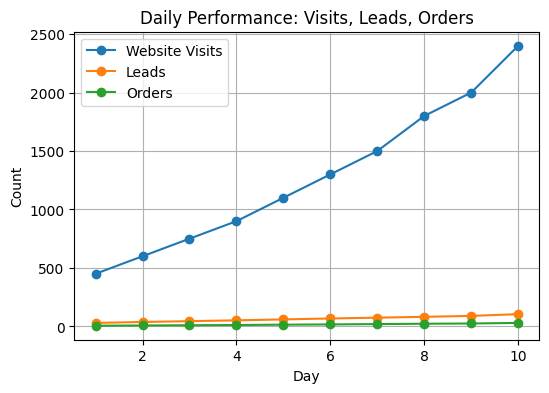

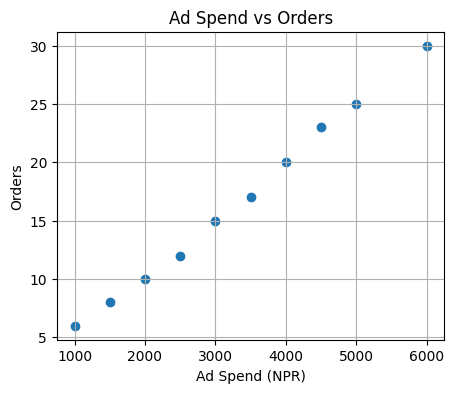

In [10]:
# =====================================================
# SECTION 2: BASIC METRICS + VISUALIZATIONS
# =====================================================

# --- Derived metrics ---
df["Visit_to_Lead_Conv"] = df["Leads"] / df["Website_Visits"]
df["Lead_to_Order_Conv"] = df["Orders"] / df["Leads"]
df["Visit_to_Order_Conv"] = df["Orders"] / df["Website_Visits"]
df["Cost_per_Order"] = df["Ad_Spend_NPR"] / df["Orders"]

print("=== DATA WITH KEY METRICS ===")
display(df)

print("\n=== SUMMARY STATISTICS ===")
display(df.describe())

# --- Correlations ---
print("\n=== CORRELATION WITH ORDERS ===")
corr_orders = df[["Ad_Spend_NPR", "Website_Visits", "Leads", "Orders"]].corr()
display(corr_orders["Orders"])

# --- Plots ---
plt.figure(figsize=(6, 4))
plt.plot(df["Day"], df["Website_Visits"], marker="o", label="Website Visits")
plt.plot(df["Day"], df["Leads"], marker="o", label="Leads")
plt.plot(df["Day"], df["Orders"], marker="o", label="Orders")
plt.xlabel("Day")
plt.ylabel("Count")
plt.title("Daily Performance: Visits, Leads, Orders")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 4))
plt.scatter(df["Ad_Spend_NPR"], df["Orders"])
plt.xlabel("Ad Spend (NPR)")
plt.ylabel("Orders")
plt.title("Ad Spend vs Orders")
plt.grid(True)
plt.show()


In [11]:
# =====================================================
# SECTION 3: SWOT ANALYSIS (FROM DATA)
# =====================================================

avg_conv = df["Visit_to_Order_Conv"].mean()
avg_cpo = df["Cost_per_Order"].mean()
corr_spend_orders = corr_orders.loc["Ad_Spend_NPR", "Orders"]
corr_visits_orders = corr_orders.loc["Website_Visits", "Orders"]
corr_leads_orders = corr_orders.loc["Leads", "Orders"]

print("=== KEY NUMBERS FOR SWOT ===")
print(f"Average Visit -> Order Conversion: {avg_conv:.3%}")
print(f"Average Cost per Order (NPR): {avg_cpo:.2f}")
print(f"Correlation(Ad Spend, Orders): {corr_spend_orders:.3f}")
print(f"Correlation(Website Visits, Orders): {corr_visits_orders:.3f}")
print(f"Correlation(Leads, Orders): {corr_leads_orders:.3f}\n")

# Very simple logic to generate points:
strengths = [
    "Strong positive correlation between ad spend and orders.",
    "Leads and orders grow steadily over time.",
    f"Average cost per order around NPR {avg_cpo:.0f}, which is acceptable for groceries."
]

weaknesses = [
    f"Overall visit-to-order conversion is only about {avg_conv:.1%}.",
    "Heavy dependence on Facebook ads as a single main channel.",
]

opportunities = [
    "Growing website traffic suggests more room for retargeting campaigns.",
    "High lead-to-order conversion indicates potential for subscription or bundle offers.",
]

threats = [
    "Ad costs may increase due to competition in Kathmandu online grocery market.",
    "Operational delays (traffic, strikes, festival rush) can affect delivery satisfaction.",
]

print("=== SWOT ANALYSIS ===\n")

print("STRENGTHS:")
for s in strengths:
    print(" -", s)

print("\nWEAKNESSES:")
for w in weaknesses:
    print(" -", w)

print("\nOPPORTUNITIES:")
for o in opportunities:
    print(" -", o)

print("\nTHREATS:")
for t in threats:
    print(" -", t)


=== KEY NUMBERS FOR SWOT ===
Average Visit -> Order Conversion: 1.312%
Average Cost per Order (NPR): 196.40
Correlation(Ad Spend, Orders): 0.998
Correlation(Website Visits, Orders): 0.999
Correlation(Leads, Orders): 0.998

=== SWOT ANALYSIS ===

STRENGTHS:
 - Strong positive correlation between ad spend and orders.
 - Leads and orders grow steadily over time.
 - Average cost per order around NPR 196, which is acceptable for groceries.

WEAKNESSES:
 - Overall visit-to-order conversion is only about 1.3%.
 - Heavy dependence on Facebook ads as a single main channel.

OPPORTUNITIES:
 - Growing website traffic suggests more room for retargeting campaigns.
 - High lead-to-order conversion indicates potential for subscription or bundle offers.

THREATS:
 - Ad costs may increase due to competition in Kathmandu online grocery market.
 - Operational delays (traffic, strikes, festival rush) can affect delivery satisfaction.


=== REGRESSION MODEL ===
Intercept: 0.429
Coefficient (per NPR): 0.00490
Equation: Orders ≈ 0.43 + 0.00490 * Ad_Spend_NPR

=== FORECAST: EXPECTED ORDERS FOR FUTURE AD SPEND ===


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Ad_Spend_NPR,Forecast_Orders
0,7000,34.7
1,8000,39.6
2,10000,49.4


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


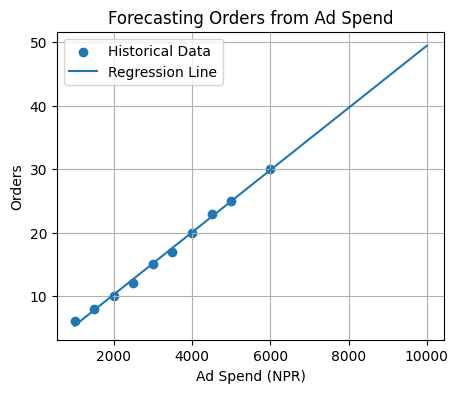

In [12]:
# =====================================================
# SECTION 4: FORECASTING (LINEAR REGRESSION)
# Predict future Orders from Ad Spend
# =====================================================

from sklearn.linear_model import LinearRegression
import numpy as np

X = df[["Ad_Spend_NPR"]]  # input feature
y = df["Orders"]          # target

model = LinearRegression()
model.fit(X, y)

print("=== REGRESSION MODEL ===")
print(f"Intercept: {model.intercept_:.3f}")
print(f"Coefficient (per NPR): {model.coef_[0]:.5f}")
print(f"Equation: Orders ≈ {model.intercept_:.2f} + {model.coef_[0]:.5f} * Ad_Spend_NPR")

# Forecast for new spends
future_spend = np.array([[7000], [8000], [10000]])  # NPR
future_pred = model.predict(future_spend)

forecast_df = pd.DataFrame({
    "Ad_Spend_NPR": future_spend.flatten(),
    "Forecast_Orders": future_pred.round(1)
})

print("\n=== FORECAST: EXPECTED ORDERS FOR FUTURE AD SPEND ===")
display(forecast_df)

# Plot line with future points
plt.figure(figsize=(5, 4))
plt.scatter(df["Ad_Spend_NPR"], df["Orders"], label="Historical Data")
x_line = np.linspace(df["Ad_Spend_NPR"].min(), 10000, 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, label="Regression Line")
plt.xlabel("Ad Spend (NPR)")
plt.ylabel("Orders")
plt.title("Forecasting Orders from Ad Spend")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# =====================================================
# SECTION 5: TARGET AUDIENCE & BUYER PERSONA
# (stored as Python dictionaries for clarity)
# =====================================================

target_audience = {
    "Location": "Kathmandu & Lalitpur (urban areas)",
    "Age_Range": "20–45 years",
    "Segments": [
        "Office workers with busy schedules",
        "Students living in hostels or rented rooms",
        "Health-conscious families"
    ],
    "Digital_Platforms": ["Facebook", "Instagram", "TikTok"],
    "Devices": ["Android phones", "Low-to-mid range smartphones"]
}

buyer_persona = {
    "Name": "Sushma KC",
    "Age": 27,
    "Occupation": "Bank employee (Putalisadak)",
    "Family": "Lives with parents in Kathmandu",
    "Pain_Points": [
        "Reaches home late, no time to buy fresh vegetables",
        "Doesn't like crowded markets",
    ],
    "Goals": [
        "Wants fresh, clean groceries delivered at home",
        "Prefers digital payment via eSewa or Khalti"
    ],
    "Online_Behavior": [
        "Scrolls Facebook and TikTok after 8 pm",
        "Follows food and health pages"
    ]
}

print("=== TARGET AUDIENCE (Nepali Market) ===")
for k, v in target_audience.items():
    print(f"{k}: {v}")

print("\n=== BUYER PERSONA EXAMPLE ===")
for k, v in buyer_persona.items():
    print(f"{k}: {v}")


=== TARGET AUDIENCE (Nepali Market) ===
Location: Kathmandu & Lalitpur (urban areas)
Age_Range: 20–45 years
Segments: ['Office workers with busy schedules', 'Students living in hostels or rented rooms', 'Health-conscious families']
Digital_Platforms: ['Facebook', 'Instagram', 'TikTok']
Devices: ['Android phones', 'Low-to-mid range smartphones']

=== BUYER PERSONA EXAMPLE ===
Name: Sushma KC
Age: 27
Occupation: Bank employee (Putalisadak)
Family: Lives with parents in Kathmandu
Pain_Points: ['Reaches home late, no time to buy fresh vegetables', "Doesn't like crowded markets"]
Goals: ['Wants fresh, clean groceries delivered at home', 'Prefers digital payment via eSewa or Khalti']
Online_Behavior: ['Scrolls Facebook and TikTok after 8 pm', 'Follows food and health pages']


In [14]:
# =====================================================
# SECTION 6: SMART OBJECTIVES, STRATEGY, KPIs
# =====================================================

SMART_objectives = [
    "Increase website visits by 30% in the next 30 days.",
    "Reach an average of 75 daily orders within 6 weeks.",
    "Improve visit-to-order conversion rate from ~1.5% to 3% in 2 months.",
    "Achieve cost-per-order below NPR 180 on average."
]

strategy_components = {
    "Social_Media": [
        "Run Facebook and TikTok ads targeting Kathmandu & Lalitpur.",
        "Promote 'First order Rs. 100 OFF' coupon.",
    ],
    "Content_Marketing": [
        "Post short recipe reels using SastoBazar ingredients.",
        "Share customer testimonials and unboxing videos."
    ],
    "Email_Messenger": [
        "Send weekly offers and festival combo packs.",
        "Send cart-abandonment reminders via Messenger."
    ],
    "SEO_Local": [
        "Optimize for keywords like 'online kirana Kathmandu', 'vegetable delivery Nepal'.",
        "Create location pages for major areas (New Baneshwor, Kupandole, etc.)."
    ]
}

KPIs = [
    "Daily website visits",
    "Number of leads (messages/calls)",
    "Number of orders (new + repeat)",
    "Visit-to-order conversion rate (%)",
    "Average cost per order (NPR)",
    "Return on ad spend (ROAS)"
]

print("=== SMART CAMPAIGN OBJECTIVES ===")
for o in SMART_objectives:
    print(" -", o)

print("\n=== STRATEGY COMPONENTS ===")
for area, items in strategy_components.items():
    print(f"\n{area}:")
    for item in items:
        print("  -", item)

print("\n=== KEY PERFORMANCE INDICATORS (KPIs) ===")
for k in KPIs:
    print(" -", k)


=== SMART CAMPAIGN OBJECTIVES ===
 - Increase website visits by 30% in the next 30 days.
 - Reach an average of 75 daily orders within 6 weeks.
 - Improve visit-to-order conversion rate from ~1.5% to 3% in 2 months.
 - Achieve cost-per-order below NPR 180 on average.

=== STRATEGY COMPONENTS ===

Social_Media:
  - Run Facebook and TikTok ads targeting Kathmandu & Lalitpur.
  - Promote 'First order Rs. 100 OFF' coupon.

Content_Marketing:
  - Post short recipe reels using SastoBazar ingredients.
  - Share customer testimonials and unboxing videos.

Email_Messenger:
  - Send weekly offers and festival combo packs.
  - Send cart-abandonment reminders via Messenger.

SEO_Local:
  - Optimize for keywords like 'online kirana Kathmandu', 'vegetable delivery Nepal'.
  - Create location pages for major areas (New Baneshwor, Kupandole, etc.).

=== KEY PERFORMANCE INDICATORS (KPIs) ===
 - Daily website visits
 - Number of leads (messages/calls)
 - Number of orders (new + repeat)
 - Visit-to-order

## ✅ Expected Learning

By completing this Colab notebook, students will:

- Learn how to **load and analyze digital marketing data** in Python.
- Understand how to compute **conversion rates, cost per order, and correlation**.
- See how data automatically informs a **SWOT analysis**.
- Practice defining **Target Audience** and **Buyer Persona** for a Nepali business.
- Build and interpret a simple **forecasting model** (linear regression).
- Formulate **SMART campaign objectives**, **strategy components**, and **KPIs**.
- Connect **numbers (data)** with **marketing strategy decisions** in a realistic scenario.

👉 This directly fulfills:  
> “Students learn real strategy building using data + persona + SWOT.”
